In [5]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
parquet_file= r'C:\Users\verma\OneDrive\Desktop\PYTHON_DATA_PROJECT\1_Data_science_job_postings_dataset\0000.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)

In [6]:
skills_exploded =df.explode('job_skills')
skills_df = (skills_exploded.groupby(['job_title_short', 'job_skills'])
             .size()
             .reset_index(name='count')
             .sort_values(by='count', ascending=False).copy())

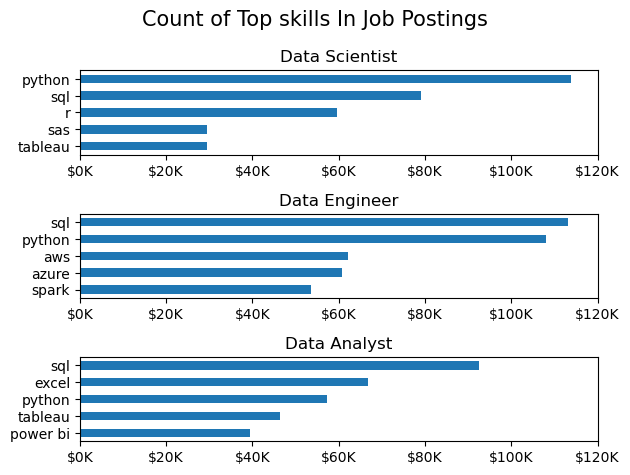

In [9]:
# We have to loop through each job titles to get the outcomes we need
fig, ax = plt.subplots(3,1)
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

for i, job_title in enumerate(job_titles):
    df_plot = skills_df[skills_df['job_title_short'] == job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='count', ax=ax[i], title=job_title)
    # ax =plt.gca()
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,120000)
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top skills In Job Postings', fontsize = 15)
fig.tight_layout()
